In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "piemonte"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,15.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,1,Piemonte,2,0,2,0,2,-1,-1,...,0.0,0.0,0.0,-1.0,0.00,100.00,-inf,0.00,0.00,-33.33
3,2020-02-28T18:00:00,1,Piemonte,7,0,7,4,11,9,9,...,0.0,71.0,0.0,4.0,0.00,63.64,12.68,0.00,0.00,450.00
4,2020-02-29T17:00:00,1,Piemonte,7,0,7,4,11,0,0,...,0.0,81.0,0.0,0.0,0.00,63.64,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2020-12-29T17:00:00,1,Piemonte,3029,196,3225,26158,29383,-920,840,...,56.0,7637.0,2204.0,-898.0,6.08,10.98,11.00,38.11,-4.39,-3.04
309,2020-12-30T17:00:00,1,Piemonte,2957,192,3149,25810,28959,-424,1046,...,33.0,8967.0,3170.0,-348.0,6.10,10.87,11.66,33.00,-2.04,-1.44
310,2020-12-31T17:00:00,1,Piemonte,2895,190,3085,25172,28257,-702,1367,...,29.0,8633.0,3221.0,-638.0,6.16,10.92,15.83,42.44,-1.04,-2.42
311,2021-01-01T17:00:00,1,Piemonte,2784,184,2968,23561,26529,-1728,1058,...,38.0,5787.0,2754.0,-1611.0,6.20,11.19,18.28,38.42,-3.16,-6.12


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 2, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 433
Nuovi tamponi: 2271.0
Percentuale nuovi positivi/nuovi tamponi: 19.1 %
Nuovi guariti: 2754.0
Nuovi deceduti: 11.0
Variazione positivi ricoverati con sintomi: -7.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: -2323.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 2, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-03T17:00:00,1,Piemonte,3379,213,3592,35121,38713,2618,3169,...,29.0,12694.0,11991.0,2330.0,5.93,9.28,24.96,26.43,8.67,7.25
1,2020-11-04T17:00:00,1,Piemonte,3525,233,3758,37819,41577,2864,3577,...,37.0,16022.0,10796.0,2698.0,6.20,9.04,22.33,33.13,9.39,7.40
2,2020-11-05T17:00:00,1,Piemonte,3698,249,3947,40027,43974,2397,3171,...,39.0,16855.0,12277.0,2208.0,6.31,8.98,18.81,25.83,6.87,5.77
3,2020-11-06T17:00:00,1,Piemonte,3871,268,4139,43777,47916,3942,4878,...,29.0,21288.0,15780.0,3750.0,6.47,8.64,22.91,30.91,7.63,8.96
4,2020-11-07T17:00:00,1,Piemonte,4122,284,4406,47083,51489,3573,4437,...,45.0,17390.0,12387.0,3306.0,6.45,8.56,25.51,35.82,5.97,7.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-29T17:00:00,1,Piemonte,3029,196,3225,26158,29383,-920,840,...,56.0,7637.0,2204.0,-898.0,6.08,10.98,11.00,38.11,-4.39,-3.04
57,2020-12-30T17:00:00,1,Piemonte,2957,192,3149,25810,28959,-424,1046,...,33.0,8967.0,3170.0,-348.0,6.10,10.87,11.66,33.00,-2.04,-1.44
58,2020-12-31T17:00:00,1,Piemonte,2895,190,3085,25172,28257,-702,1367,...,29.0,8633.0,3221.0,-638.0,6.16,10.92,15.83,42.44,-1.04,-2.42
59,2021-01-01T17:00:00,1,Piemonte,2784,184,2968,23561,26529,-1728,1058,...,38.0,5787.0,2754.0,-1611.0,6.20,11.19,18.28,38.42,-3.16,-6.12


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

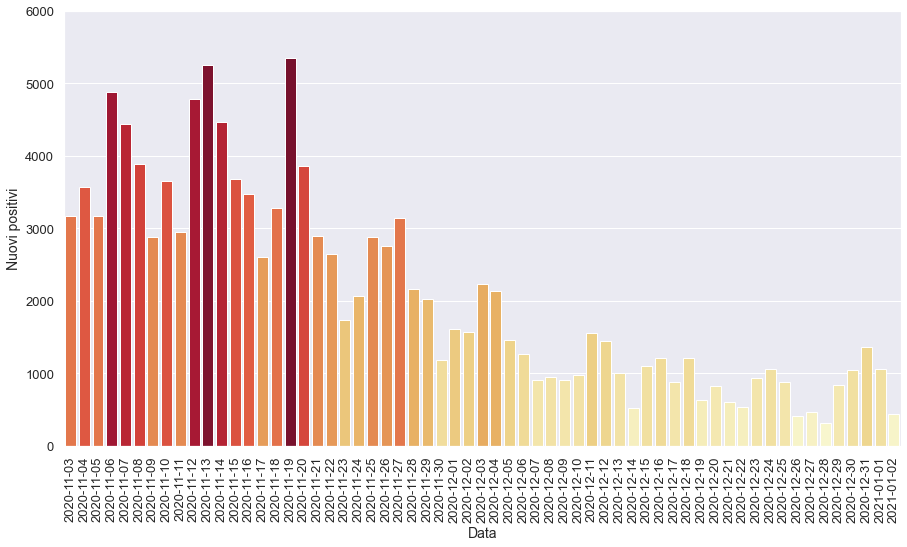

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

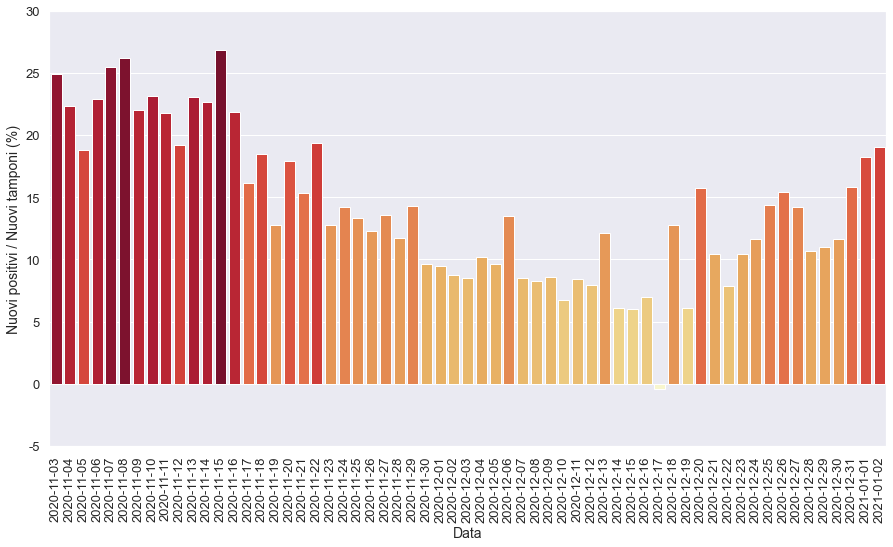

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

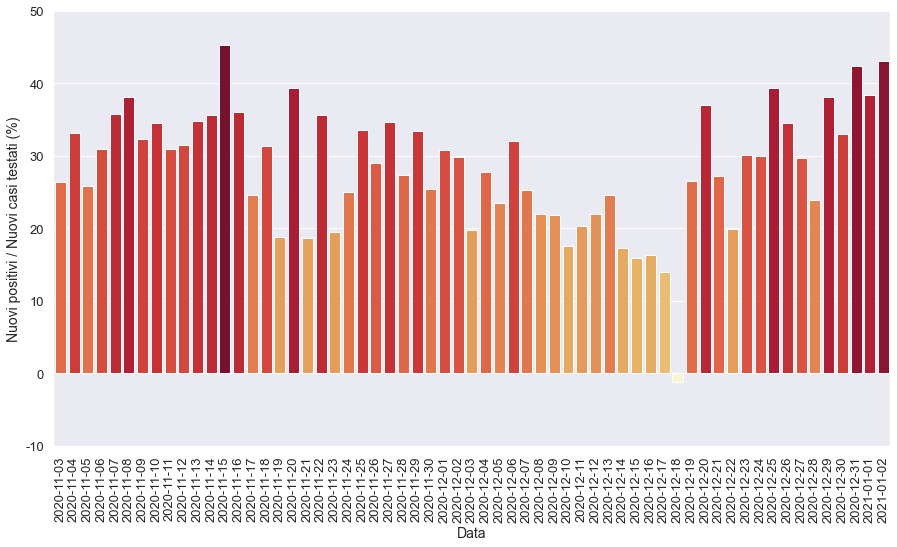

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

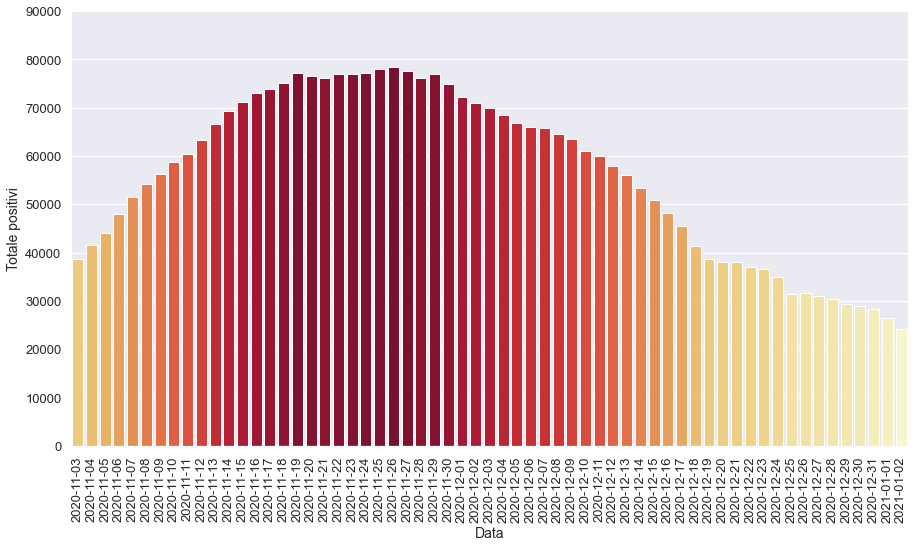

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

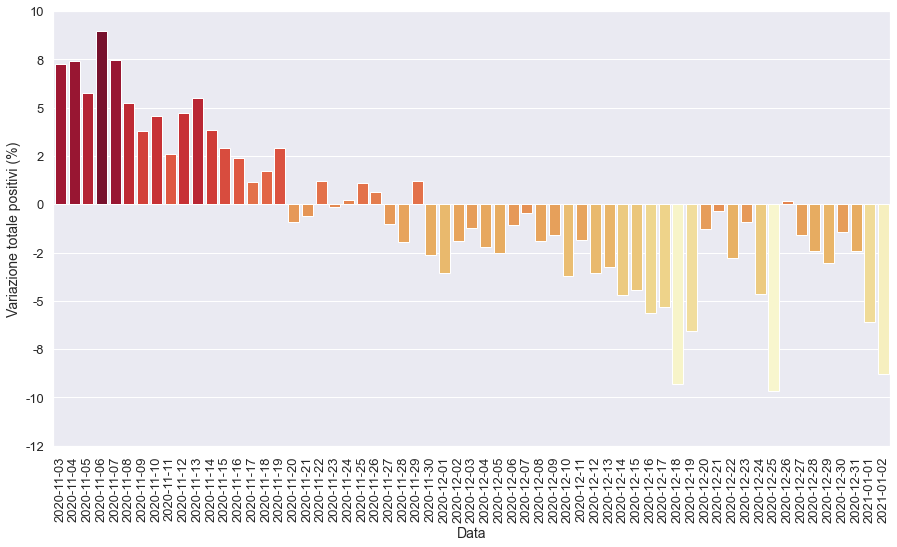

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

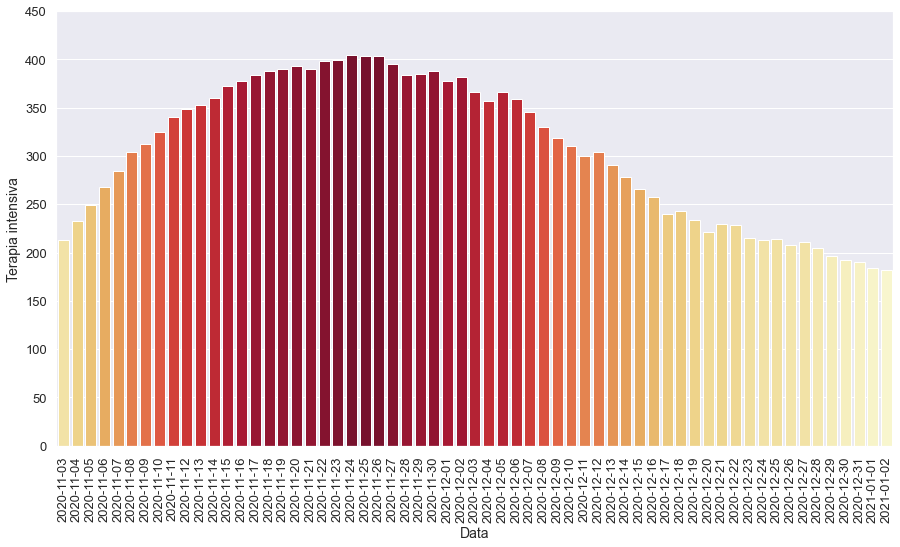

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

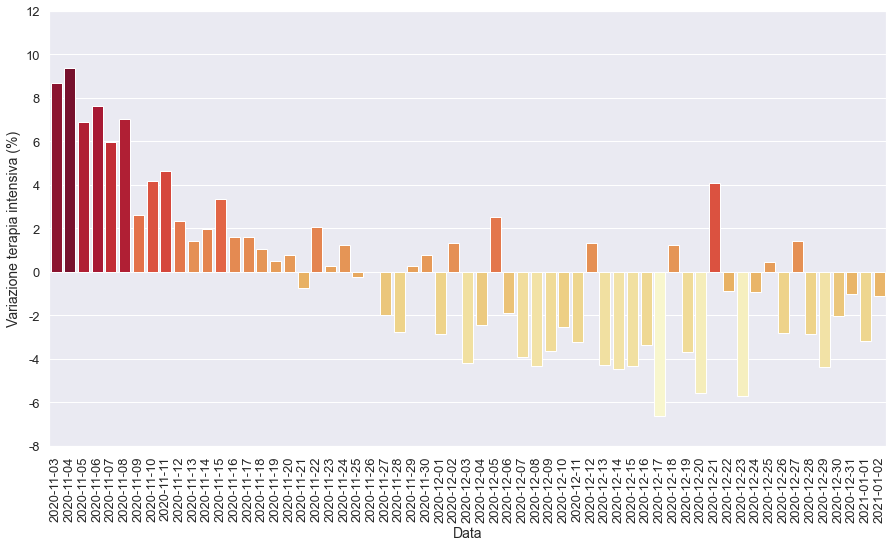

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

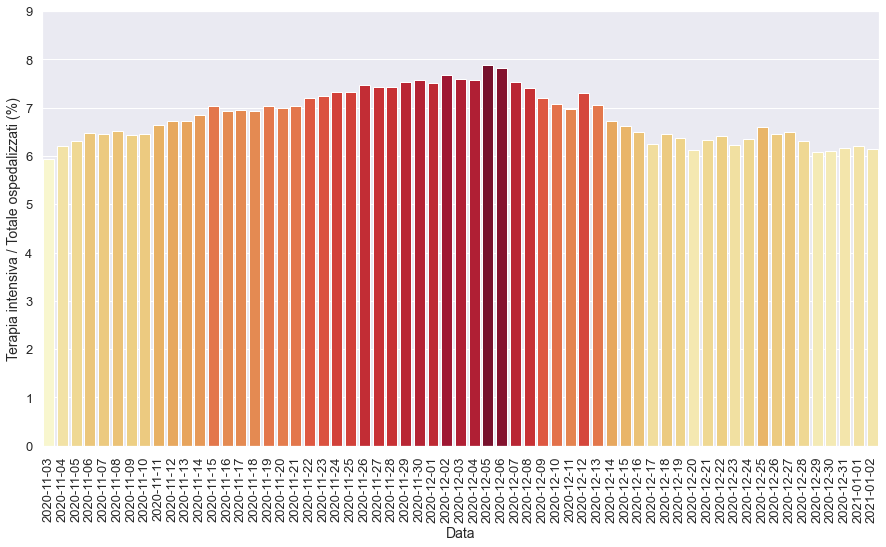

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

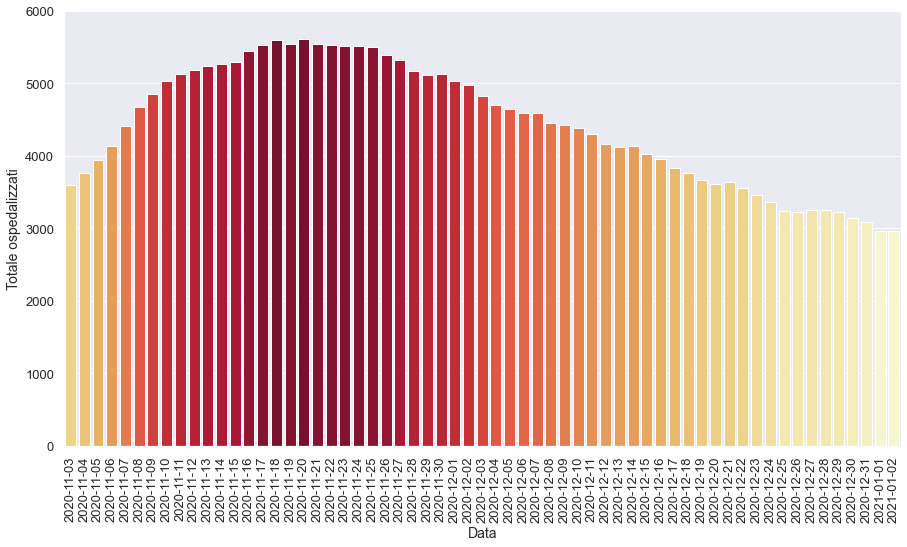

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

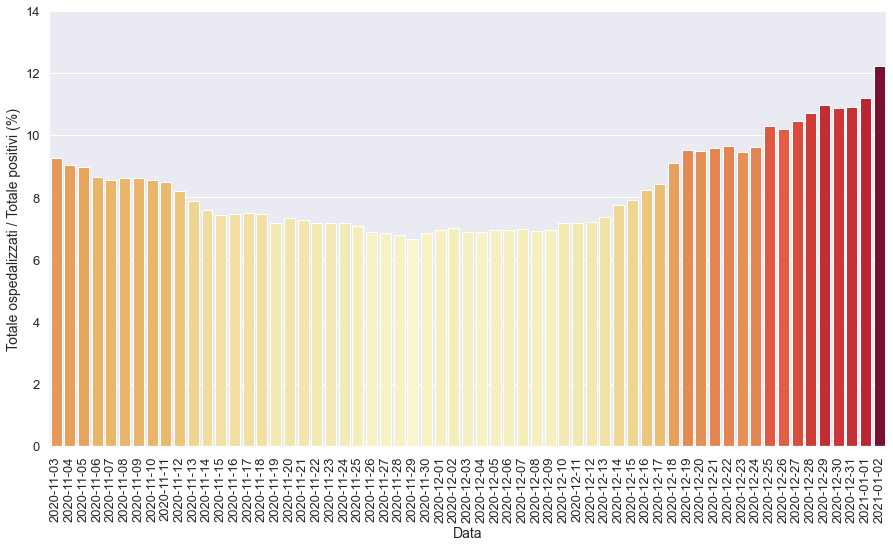

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

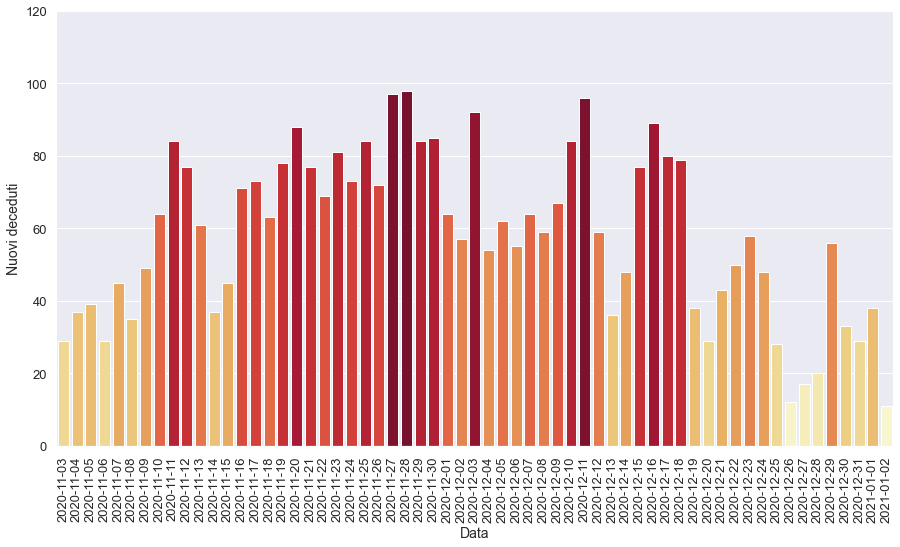

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

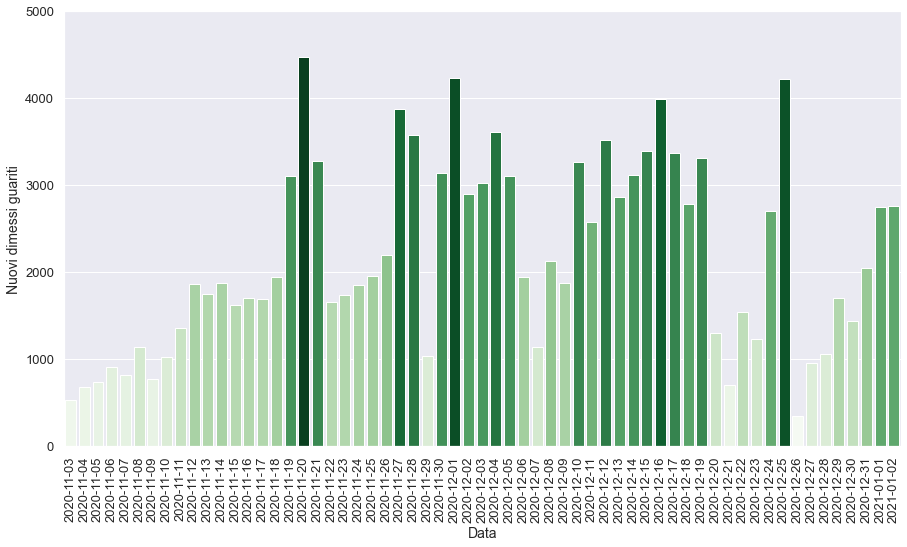

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-03T17:00:00,1,Piemonte,4459,366,4825,65181,70006,-881,2230,...,92.0,26163.0,11290.0,-728.0,7.59,6.89,8.52,19.75,-4.19,-1.24
1,2020-12-04T17:00:00,1,Piemonte,4351,357,4708,63768,68476,-1530,2132,...,54.0,20846.0,7663.0,-1413.0,7.58,6.88,10.23,27.82,-2.46,-2.19
2,2020-12-05T17:00:00,1,Piemonte,4276,366,4642,62121,66763,-1713,1456,...,62.0,15100.0,6179.0,-1647.0,7.88,6.95,9.64,23.56,2.52,-2.50
3,2020-12-06T17:00:00,1,Piemonte,4239,359,4598,61440,66038,-725,1269,...,55.0,9386.0,3953.0,-681.0,7.81,6.96,13.52,32.10,-1.91,-1.09
4,2020-12-07T17:00:00,1,Piemonte,4243,345,4588,61161,65749,-289,911,...,64.0,10752.0,3595.0,-279.0,7.52,6.98,8.47,25.34,-3.90,-0.44
5,2020-12-08T17:00:00,1,Piemonte,4124,330,4454,60059,64513,-1236,952,...,59.0,11514.0,4342.0,-1102.0,7.41,6.90,8.27,21.93,-4.35,-1.88
6,2020-12-09T17:00:00,1,Piemonte,4102,318,4420,59063,63483,-1030,906,...,67.0,10579.0,4153.0,-996.0,7.19,6.96,8.56,21.82,-3.64,-1.60
7,2020-12-10T17:00:00,1,Piemonte,4069,310,4379,56728,61107,-2376,974,...,84.0,14418.0,5560.0,-2335.0,7.08,7.17,6.76,17.52,-2.52,-3.74
8,2020-12-11T17:00:00,1,Piemonte,4005,300,4305,55686,59991,-1116,1553,...,96.0,18504.0,7616.0,-1042.0,6.97,7.18,8.39,20.39,-3.23,-1.83
9,2020-12-12T17:00:00,1,Piemonte,3857,304,4161,53700,57861,-2130,1443,...,59.0,18227.0,6562.0,-1986.0,7.31,7.19,7.92,21.99,1.33,-3.55


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

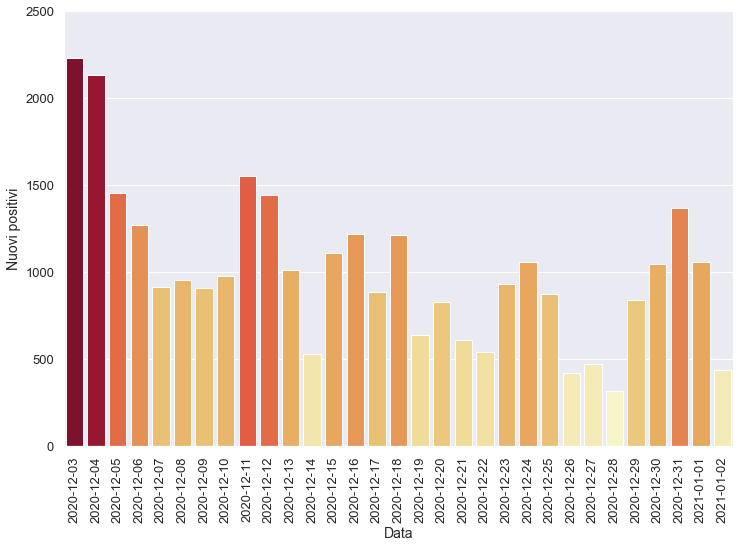

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

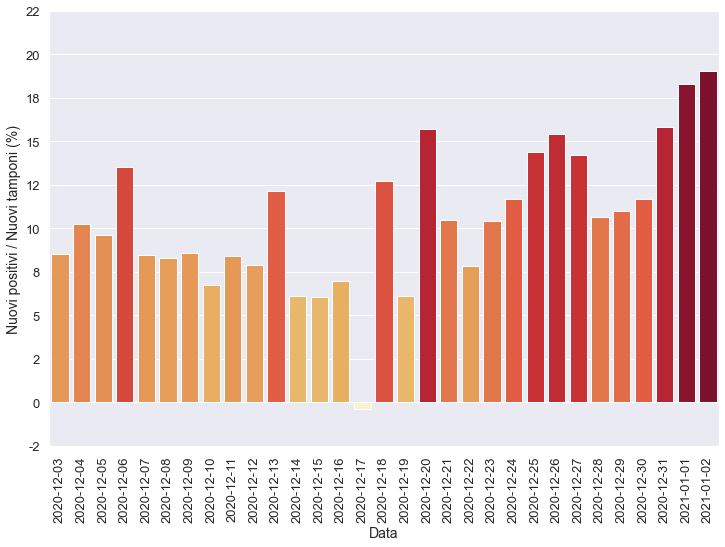

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

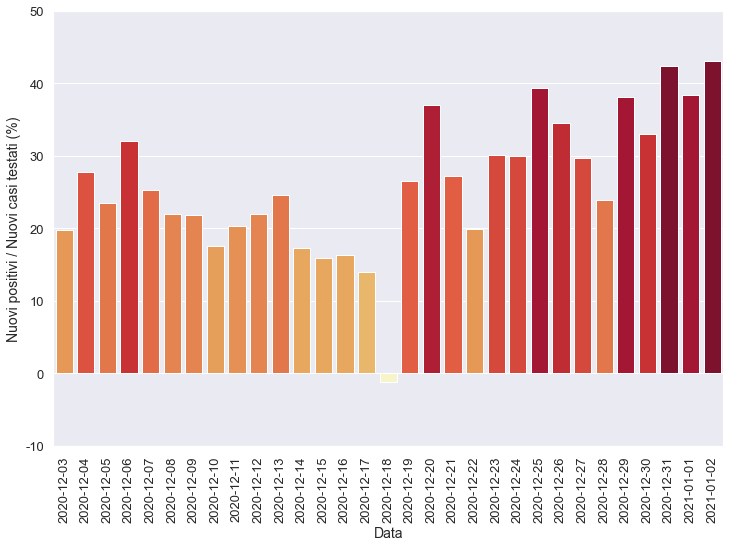

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

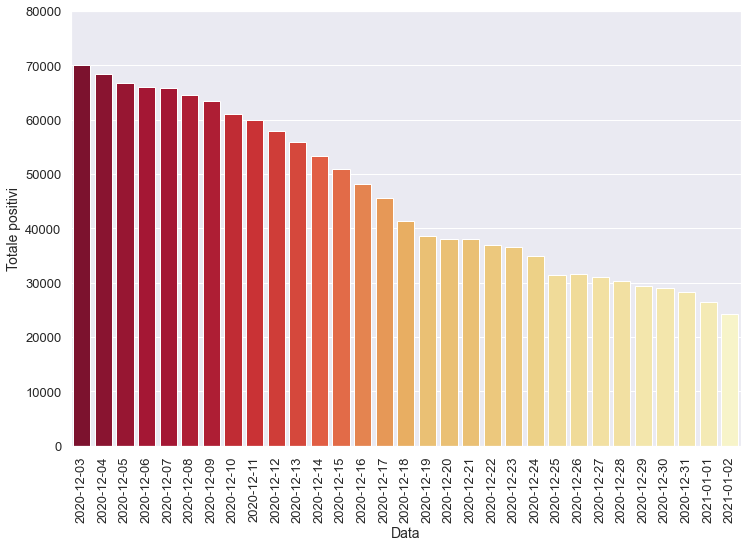

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

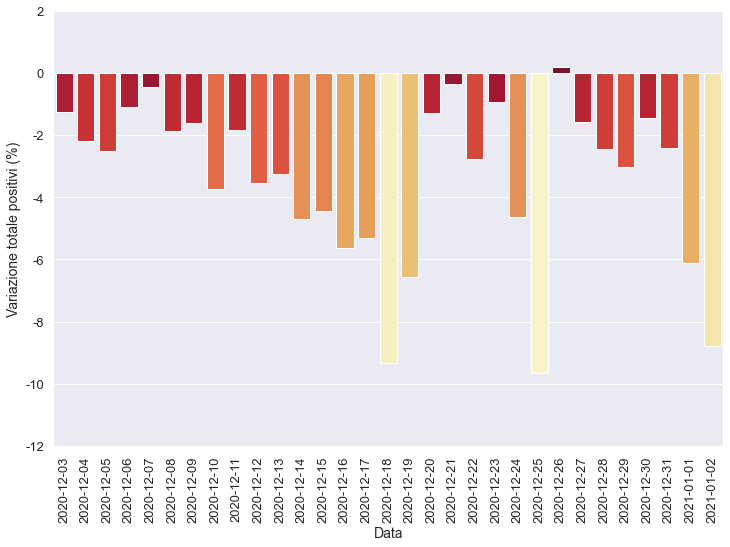

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

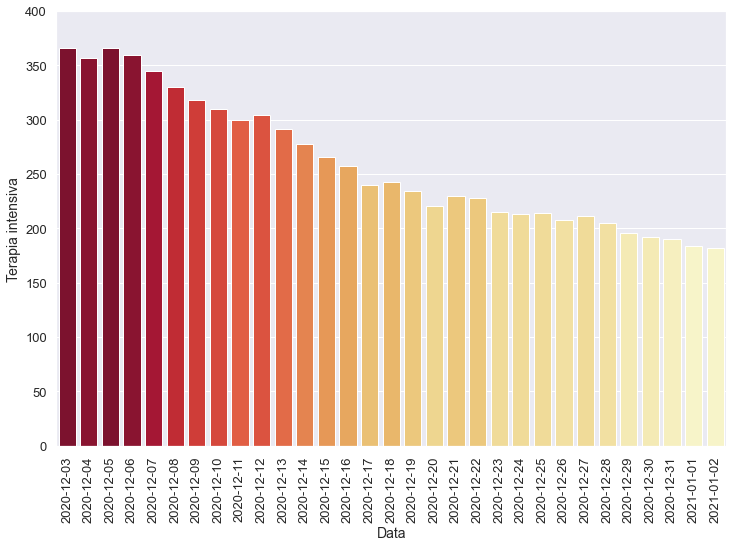

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

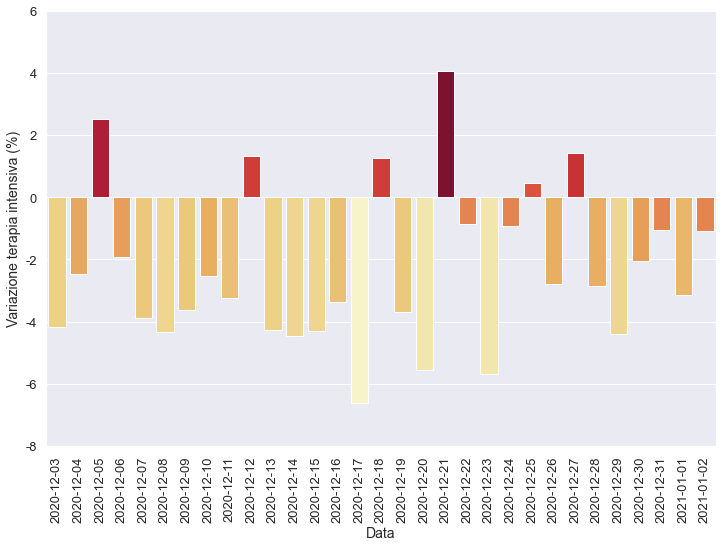

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

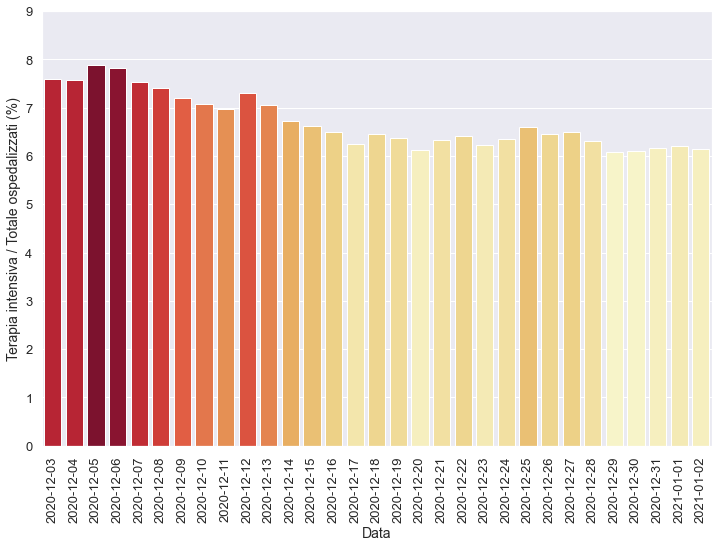

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

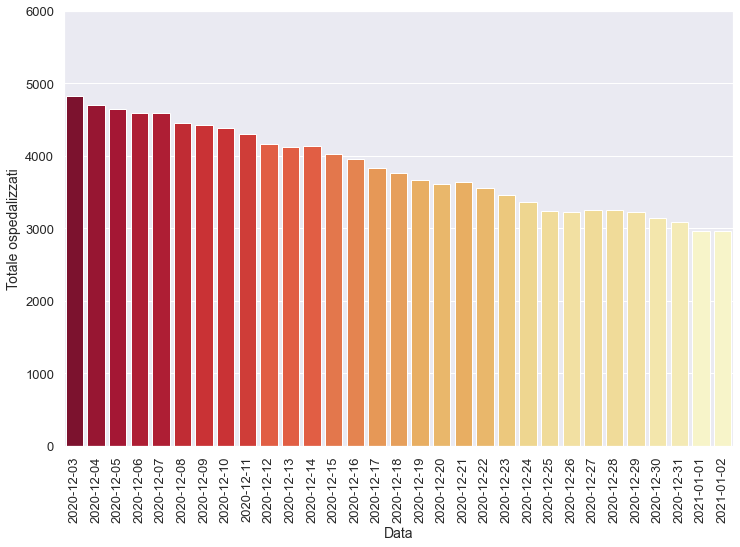

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

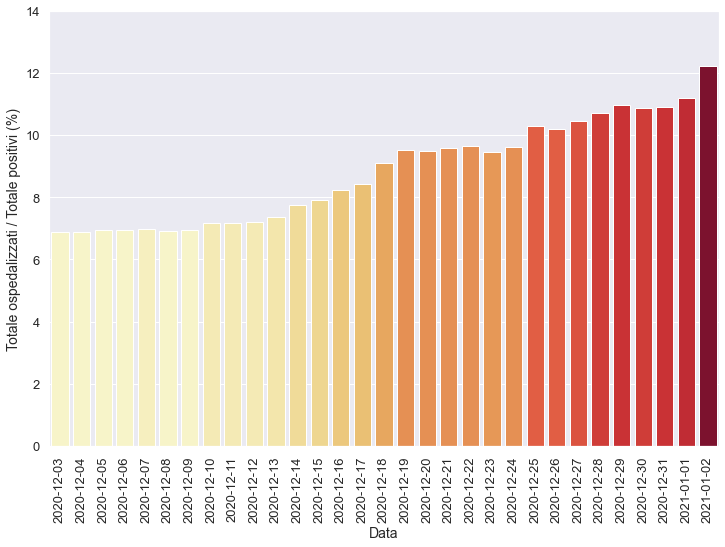

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

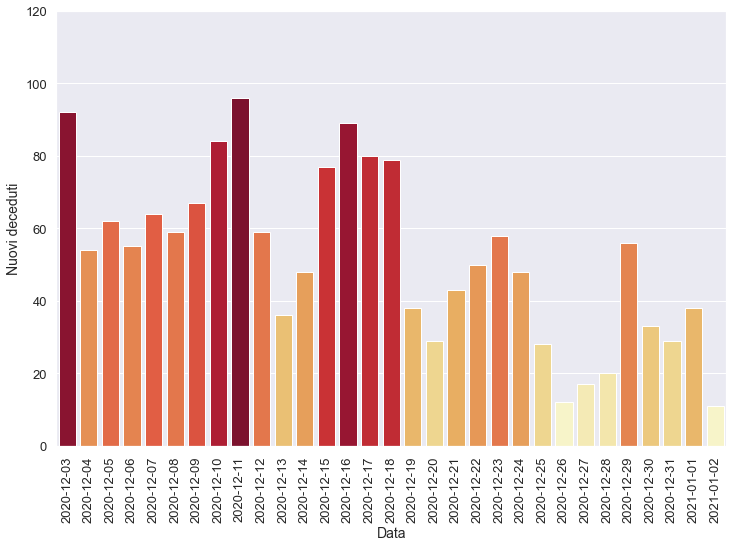

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

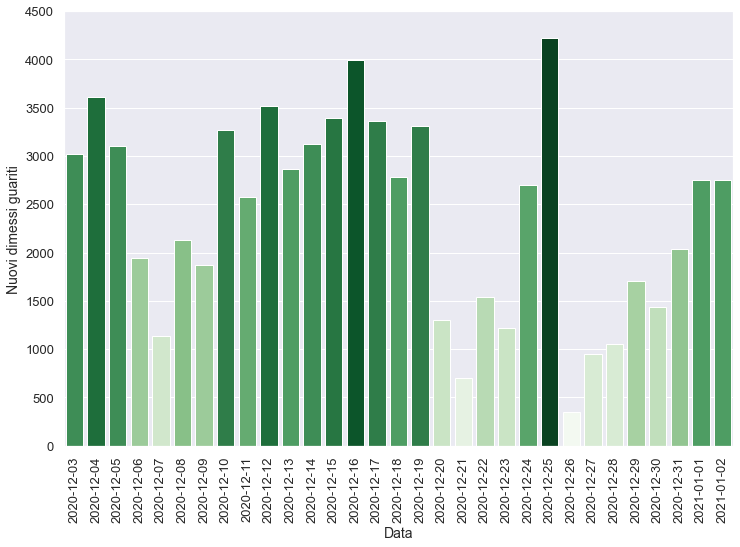

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-26T17:00:00,1,Piemonte,3011,208,3219,28338,31557,60,417,...,12.0,2704.0,1206.0,84.0,6.46,10.20,15.42,34.58,-2.80,0.19
1,2020-12-27T17:00:00,1,Piemonte,3039,211,3250,27812,31062,-495,470,...,17.0,3302.0,1583.0,-526.0,6.49,10.46,14.23,29.69,1.44,-1.57
2,2020-12-28T17:00:00,1,Piemonte,3042,205,3247,27056,30303,-759,313,...,20.0,2941.0,1309.0,-756.0,6.31,10.72,10.64,23.91,-2.84,-2.44
3,2020-12-29T17:00:00,1,Piemonte,3029,196,3225,26158,29383,-920,840,...,56.0,7637.0,2204.0,-898.0,6.08,10.98,11.00,38.11,-4.39,-3.04
4,2020-12-30T17:00:00,1,Piemonte,2957,192,3149,25810,28959,-424,1046,...,33.0,8967.0,3170.0,-348.0,6.10,10.87,11.66,33.00,-2.04,-1.44
5,2020-12-31T17:00:00,1,Piemonte,2895,190,3085,25172,28257,-702,1367,...,29.0,8633.0,3221.0,-638.0,6.16,10.92,15.83,42.44,-1.04,-2.42
6,2021-01-01T17:00:00,1,Piemonte,2784,184,2968,23561,26529,-1728,1058,...,38.0,5787.0,2754.0,-1611.0,6.20,11.19,18.28,38.42,-3.16,-6.12
7,2021-01-02T17:00:00,1,Piemonte,2777,182,2959,21238,24197,-2332,433,...,11.0,2271.0,1004.0,-2323.0,6.15,12.23,19.07,43.13,-1.09,-8.79


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

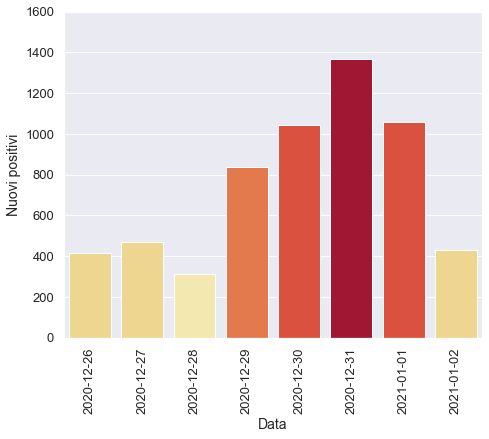

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

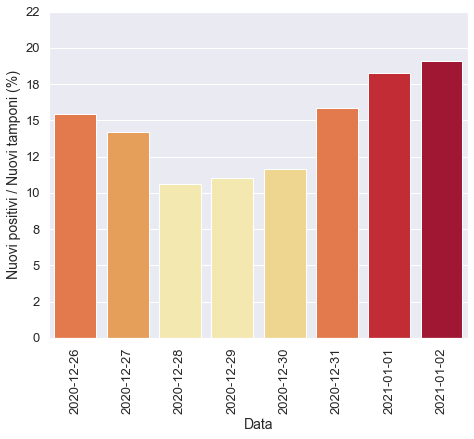

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

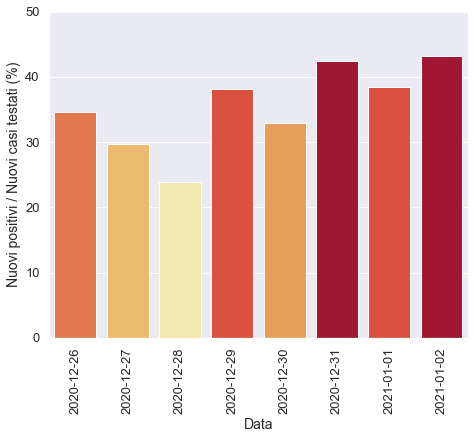

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

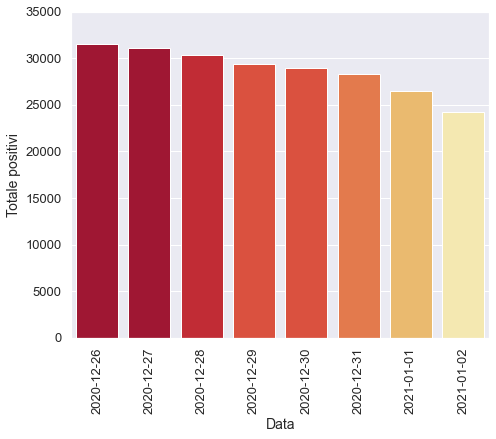

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

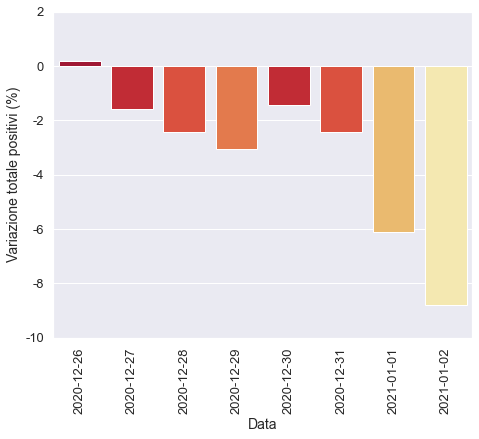

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

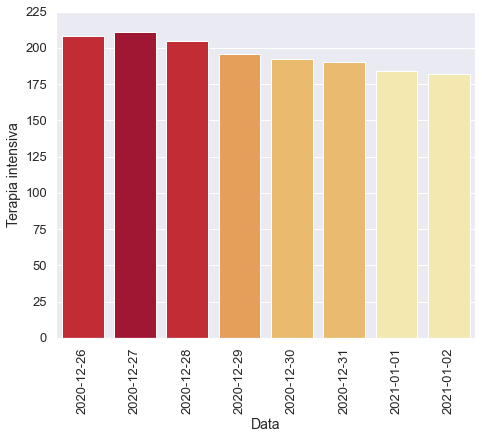

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

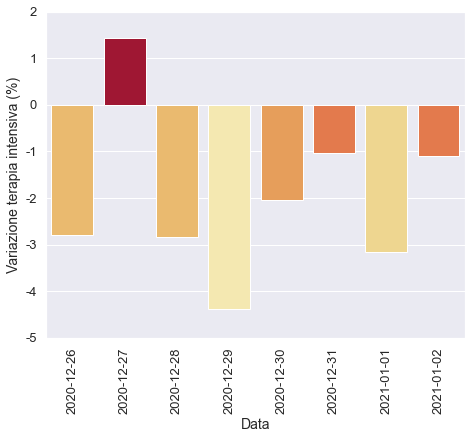

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

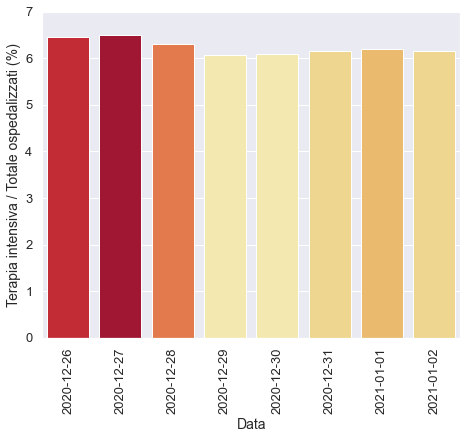

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

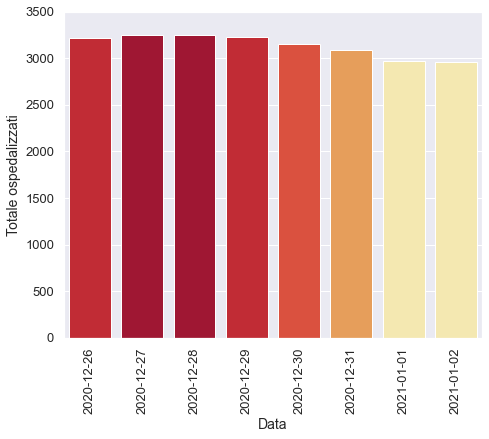

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

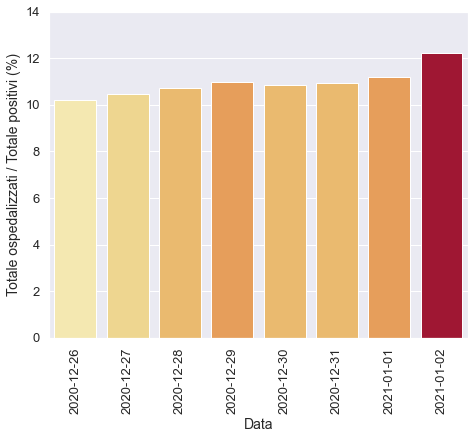

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

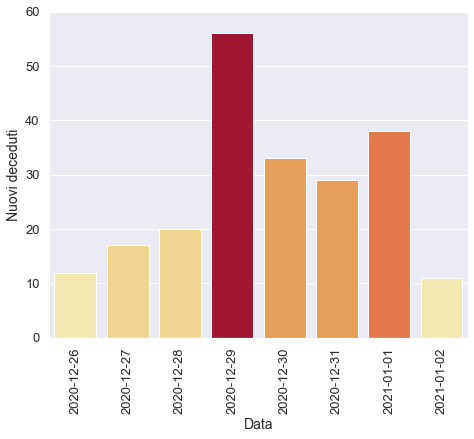

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

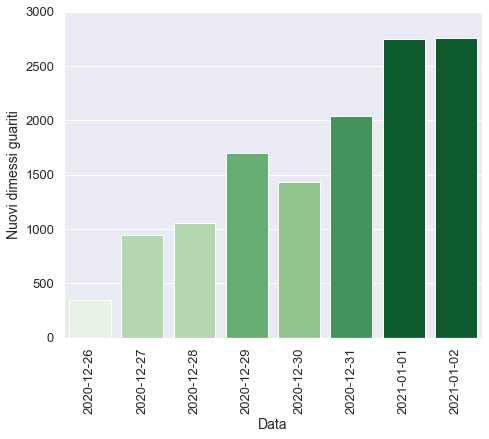

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)